## Diffraction Pattern Simulation

This notebook demonstrates the simulation of a diffraction pattern from a slit using Fourier transform, focusing on explaining the Fourier transform steps.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# in order to use image files (.jpg) from your google drive:
from google.colab import drive
drive.mount('/content/drive')
import os

# Print the current working directory
print("Current Directory:", os.getcwd())

# List all files and directories in the current directory
print("Files and directories in the current directory:")
print(os.listdir('.'))


Mounted at /content/drive
Current Directory: /content
Files and directories in the current directory:
['.config', 'drive', 'sample_data']


### Step 1: Define the Slit Function

Define a function that simulates a slit by creating an array where the slit is represented by 1s (allowing light through) and 0s (blocking light).

In [ ]:

def centered_slit(x_scale, width):
    """
    Generates a transmission array for a slit centered at zero.

    Args:
      x_scale (numpy.ndarray): An array of positions along the x-axis.
      width (float): The full width of the slit where transmission is 100%.

    Returns:
      numpy.ndarray: An array of the same shape as x_scale, where elements are 0
                     outside the slit width and 1 inside the slit width.
    """
    slit = np.zeros_like(x_scale)
    slit[np.abs(x_scale) < width / 2] = 1
    return slit


### Step 2: Setup the x-axis and Define the Slit

Set up the `x_scale`, define the width of the slit, generate the slit and plot it.

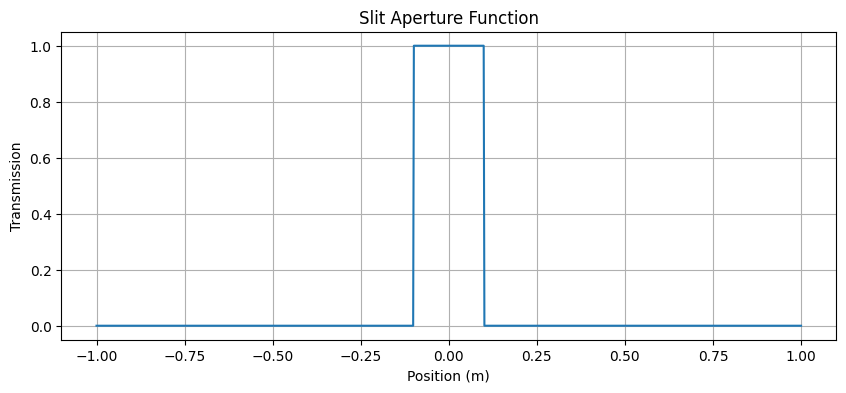

In [ ]:

x_scale = np.linspace(-1, 1, 1000)  # x-axis scale in meters
slit_width = 0.2  # Slit width in meters

aperture = centered_slit(x_scale, slit_width)

# Plot the aperture function (slit)
plt.figure(figsize=(10, 4))
plt.plot(x_scale, aperture)
plt.title('Slit Aperture Function')
plt.xlabel('Position (m)')
plt.ylabel('Transmission')
plt.grid(True)
plt.show()


### Step 3: Compute the Fourier Transform without Shift

First, perform a simple Fourier transform without using `fftshift` to see the typical numerical output.

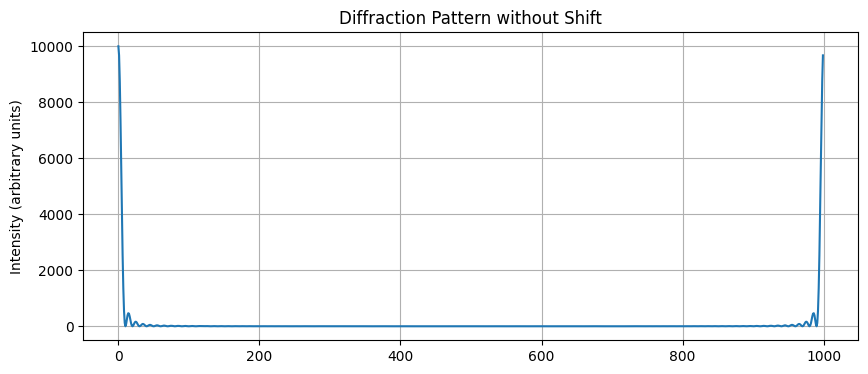

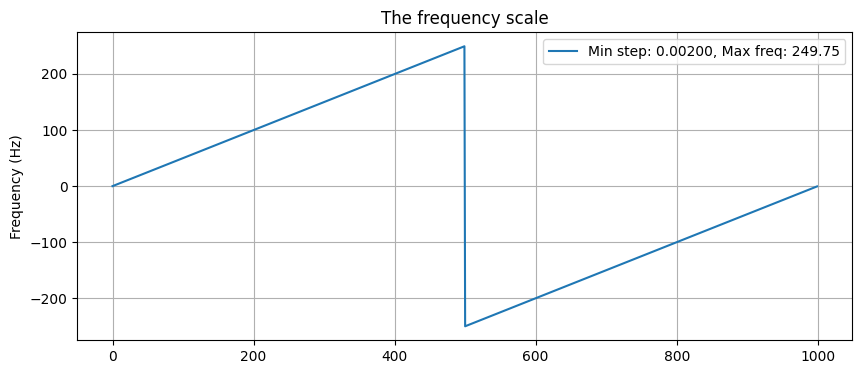

In [ ]:

# Compute the Fourier transform without shift
fourier_transform_no_shift = np.fft.fft(aperture)
intensity_pattern_no_shift = np.abs(fourier_transform_no_shift)**2

# Frequency scale without shift
frequency_scale_no_shift = np.fft.fftfreq(x_scale.size, d=x_scale[1] - x_scale[0])
freq_min_step = x_scale[1] - x_scale[0]
freq_max_range = np.max(np.abs(frequency_scale_no_shift))


# Plot the Fourier Transform without shift
plt.figure(figsize=(10, 4))
#plt.plot(frequency_scale_no_shift, intensity_pattern_no_shift)
plt.plot(intensity_pattern_no_shift)
plt.title('Diffraction Pattern without Shift')
#plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (arbitrary units)')
plt.grid(True)
plt.show()

# The same thing is happening to the frequency scale
plt.figure(figsize=(10, 4))
#plt.plot(frequency_scale_no_shift, intensity_pattern_no_shift)
plt.plot(frequency_scale_no_shift, label=f'Min step: {freq_min_step:.5f}, Max freq: {freq_max_range:.2f}')
plt.title('The frequency scale')
#plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)
plt.show()


### Step 4: Apply `fftshift` and Show Corrected Fourier Transform

The numerical FFT "disorders" the scales. In order to recover the information centered at 0, we have to rearrange the arrays.  We apply `fftshift` to rearrange the zero-frequency component to the center, and plot the result to visualize the symmetric nature of the diffraction pattern.

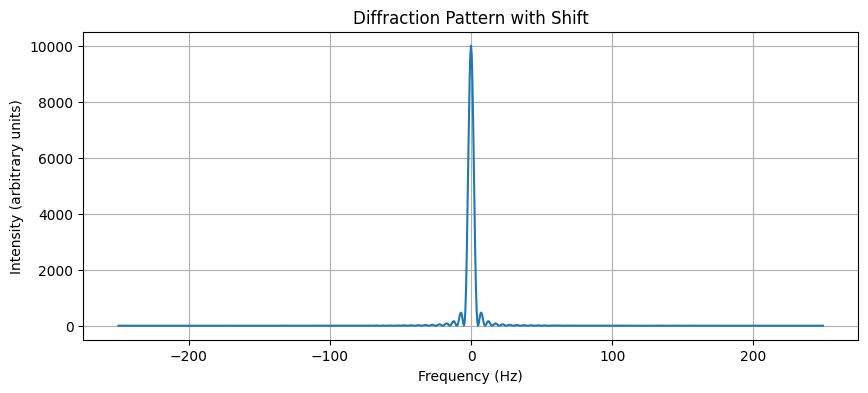

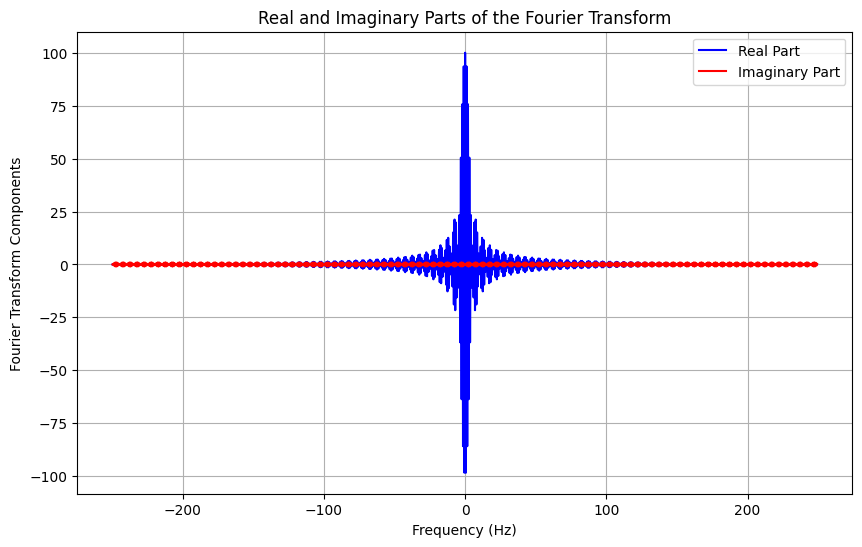

In [ ]:

# Apply fftshift to rearrange the zero-frequency component to the center
fourier_transform_shifted = np.fft.fftshift(fourier_transform_no_shift)
intensity_pattern_shifted = np.abs(fourier_transform_shifted)**2

# Adjust the frequency scale accordingly
frequency_scale_shifted = np.fft.fftshift(frequency_scale_no_shift)

# Plot the Fourier Transform with shift
plt.figure(figsize=(10, 4))
plt.plot(frequency_scale_shifted, intensity_pattern_shifted)
plt.title('Diffraction Pattern with Shift')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (arbitrary units)')
plt.grid(True)
plt.show()

# Plot the Real and Imaginary parts of the Fourier Transform
plt.figure(figsize=(10, 6))
plt.plot(frequency_scale_shifted, fourier_transform_shifted.real, label='Real Part', color='blue')
plt.plot(frequency_scale_shifted, fourier_transform_shifted.imag, label='Imaginary Part', color='red')
plt.title('Real and Imaginary Parts of the Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Transform Components')
plt.grid(True)
plt.legend()
plt.show()

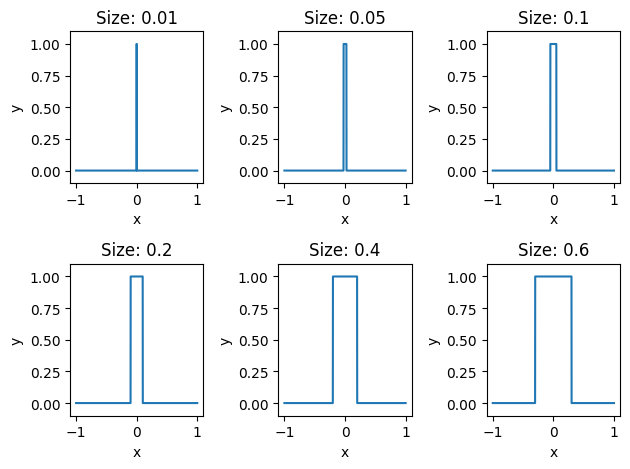

In [ ]:
#Define an array of sizes to try out
sizes=[0.01,0.05,0.1,0.2,0.4,0.6]

#Loop over the sizes, creating a subplot for each one
for size in sizes:
    plt.subplot(2,3,sizes.index(size)+1)
    plt.plot(x_scale,centered_slit(x_scale,size))
    plt.title('Size: '+str(size))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-0.1,1.1)
plt.tight_layout()
plt.show()

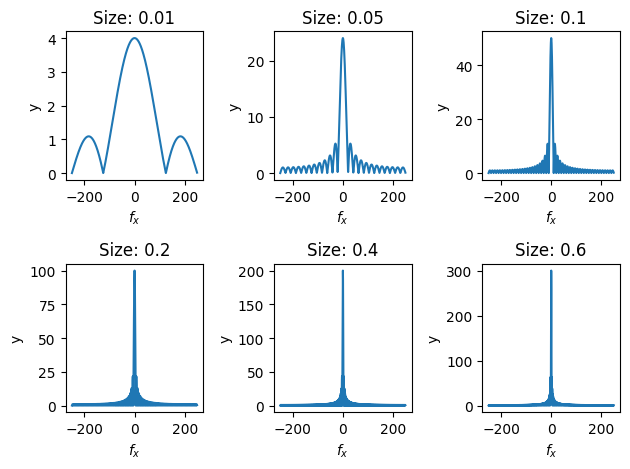

In [ ]:
#Loop over the sizes again, taking the FFT of each one and plotting it
for size in sizes:
    plt.subplot(2,3,sizes.index(size)+1)
    slit_fft=np.fft.fftshift(np.fft.fft(centered_slit(x_scale,size)))
    plt.plot(frequency_scale_shifted,np.abs(slit_fft))
    plt.title('Size: '+str(size))
    plt.xlabel(r'$f_x$')
    plt.ylabel('y')
plt.tight_layout()
plt.show()

# Third: Other 1D examples

In [ ]:
def gaussian(x, sigma):
    return np.exp(-x**2/(2*sigma**2))

def slit(x, size, position):
    slit = np.zeros_like(x)
    slit[np.abs(x-position) < size / 2] = 1
    return slit

def double_slit(x, size, sep):
    return slit(x,size,-sep/2)+slit(x,size,sep/2)

def centered_grating(x, size, sep, n_slits):
    grating=np.zeros_like(x)
    for i in range(n_slits):
        grating+=slit(x,size,sep*(i-n_slits/2))
    return grating

In [ ]:
#Define dimensions
size=0.01
#x=np.linspace(-1,1,10**3)
x=np.linspace(-1,1,10**4)
sep=2.3*size
n_slits=11

(-0.2, 0.2)

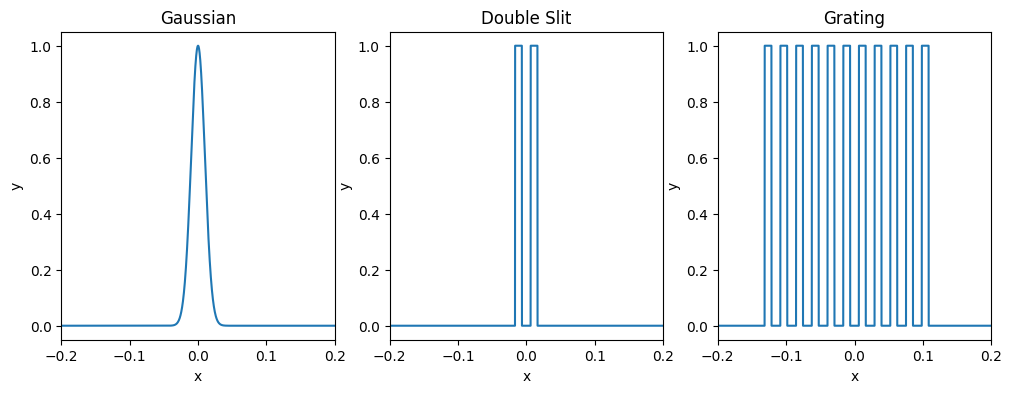

In [ ]:
#Show the functions as 3 subplots
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.plot(x,gaussian(x,size))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian')
plt.xlim(-0.2,0.2)

plt.subplot(1,3,2)
plt.plot(x,double_slit(x,size,sep))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Double Slit')
plt.xlim(-0.2,0.2)

plt.subplot(1,3,3)
plt.plot(x,centered_grating(x,size,sep,n_slits))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grating')
plt.xlim(-0.2,0.2)

Text(0.5, 1.0, 'F[Grating]')

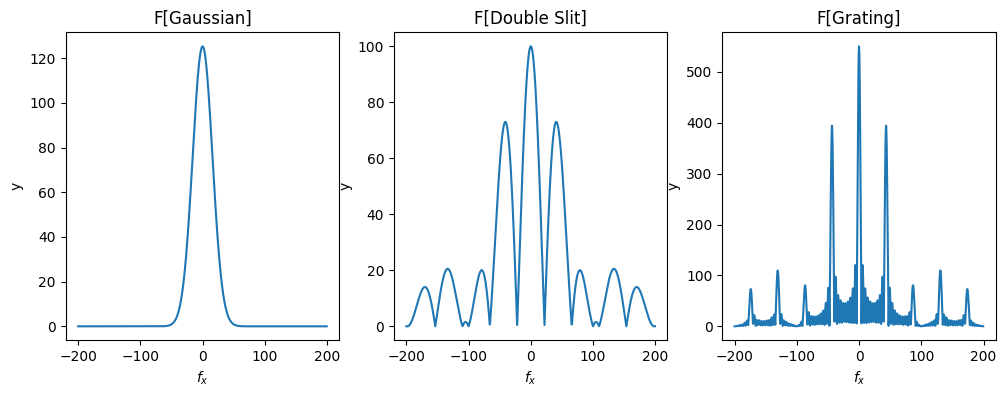

In [ ]:
#Define frequencies
freq=np.fft.fftshift(np.fft.fftfreq(len(x),d=x[1]-x[0]))

#Show the FFT of the functions as 3 subplots
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
#plt.plot(freq,np.abs(np.fft.fftshift(np.fft.fft(gaussian(x,size)))))
plt.plot(freq[4600:5400],np.abs(np.fft.fftshift(np.fft.fft(gaussian(x,size)))[4600:5400]))
plt.xlabel(r'$f_x$')
plt.ylabel('y')
plt.title('F[Gaussian]')

plt.subplot(1,3,2)
plt.plot(freq[4600:5400],np.abs(np.fft.fftshift(np.fft.fft(double_slit(x,size,sep)))[4600:5400]))
plt.xlabel(r'$f_x$')
plt.ylabel('y')
plt.title('F[Double Slit]')

plt.subplot(1,3,3)
plt.plot(freq[4600:5400],np.abs(np.fft.fftshift(np.fft.fft(centered_grating(x,size,sep,n_slits)))[4600:5400]))
plt.xlabel(r'$f_x$')
plt.ylabel('y')
plt.title('F[Grating]')

# Fourth: 2D examples

In [ ]:
#Define a 2D coordinate grid
x=np.linspace(-10,10,10**3)
y=np.linspace(-10,10,10**3)

#this concept of meshgrid (also in matlab) makes a discrete coordinate matrix
X,Y=np.meshgrid(x,y)

Text(0, 0.5, 'y')

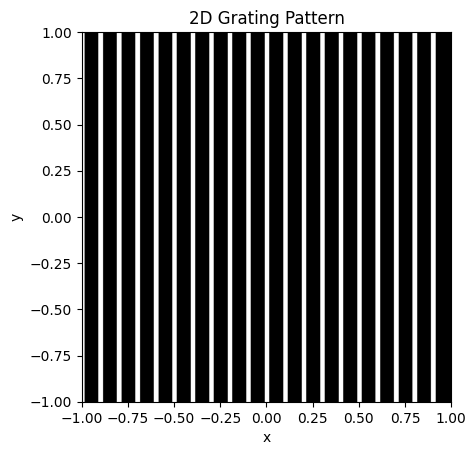

In [ ]:
def grating_X(x, y, sizex, sep, n_slits):
    """
    Generates a 2D grating of slits parallel to the y-axis.

    Args:
      x (numpy.ndarray): x-coordinates.
      y (numpy.ndarray): y-coordinates.
      sizex (float): Width of each slit in the x direction.
      sep (float): Separation between slits.
      n_slits (int): Number of slits.

    Returns:
      numpy.ndarray: A 2D array with a grating pattern.
    """
    X, Y = np.meshgrid(x, y)
    grating = np.zeros_like(X)

    # Define the positions for the slits
    for i in range(n_slits):
        center_x = (i - n_slits // 2) * sep
        slit_x = np.abs(X - center_x) < sizex / 2
        grating += slit_x

    return grating



# define grid parameters for plotting
grid_size = 1000  # Number of points along each axis
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)

sizex = 0.025  # Width of each slit in the x direction
sep = 0.1  # Separation between slits
n_slits = 20  # Number of slits

# Generate the 2D grating
grating_pattern = grating_X(x, y, sizex, sep, n_slits)

# Plot the grating
plt.imshow(grating_pattern, extent=[-1, 1, -1, 1], origin='lower', cmap='gray')
plt.title('2D Grating Pattern')
plt.xlabel('x')
plt.ylabel('y')


Text(0.5, 1.0, 'Transformed grating, y sum')

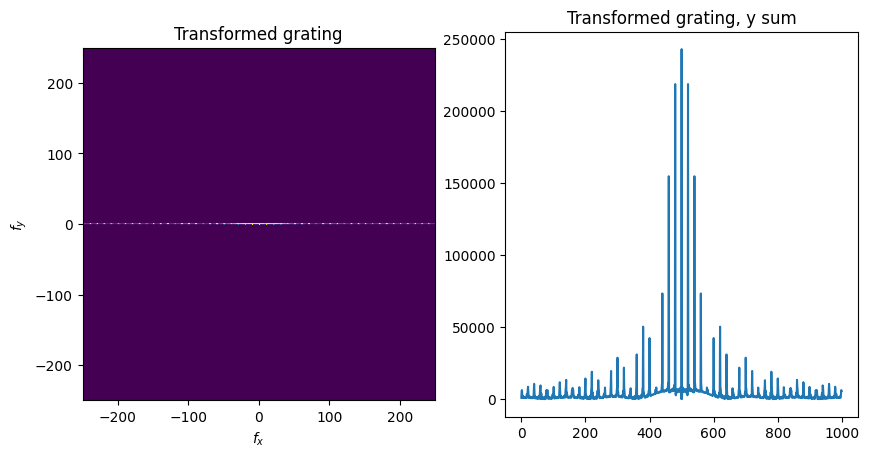

In [ ]:
# Define frequencies
freqx=np.fft.fftshift(np.fft.fftfreq(len(x),d=x[1]-x[0]))
freqy=np.fft.fftshift(np.fft.fftfreq(len(y),d=y[1]-y[0]))

# Show the FFT of the grating pattern
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(grating_pattern))),
           extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed grating')
# It is important to set a cut off at the intensity. Otherwise, because the color scale is linear you will just see
# a bright dot at the center that corresponde to the very low frequencies of the image.
plt.clim(0,2000)

# Show the FFT of the functions as 4 subplots
plt.subplot(1,2,2)
plt.plot(np.sum(np.abs(np.fft.fftshift(np.fft.fft2(grating_pattern))),axis=0))
plt.title('Transformed grating, y sum')

In [ ]:
#Define square and round apertures, a vertical slit, and an random image

def square_aperture(x,y,size):
    aperture_1, aperture_2 = np.zeros_like(x), np.zeros_like(y)
    aperture_1[np.abs(x)<size/2]=1
    aperture_2[np.abs(y)<size/2]=1
    return aperture_1*aperture_2


def round_aperture(x,y,size):
    aperture=np.zeros_like(x)
    aperture[x**2+y**2<size**2]=1
    return aperture

def slit(x,y,sizex, sizey):
    slit_1, slit_2 = np.zeros_like(x), np.zeros_like(y)
    slit_1[np.abs(x)<sizex/2]=1
    slit_2[np.abs(y)<sizey/2]=1
    return slit_1*slit_2



In [ ]:
from PIL import Image
def internet_image(x,y,path):
    # Load the PNG file using Pillow
    img = Image.open(path)
    # Convert the image to grayscale
    img = img.convert('L')
    # Resize the image to the desired number of pixels
    img = img.resize((len(x), len(y)))
    # Convert the image to a NumPy array
    img_array = np.asarray(img)
    # Normalize the array
    img_array = img_array / 255.0
    return img_array

In [ ]:
#Define sizes c, s, and n
c=2.        #used for dimension of square
s=0.3       #used for dimension of round aperture
size_x=1    #used for slit
size_y=50   #used for slit

In [ ]:
print("Current Directory:", os.getcwd())

Current Directory: /content


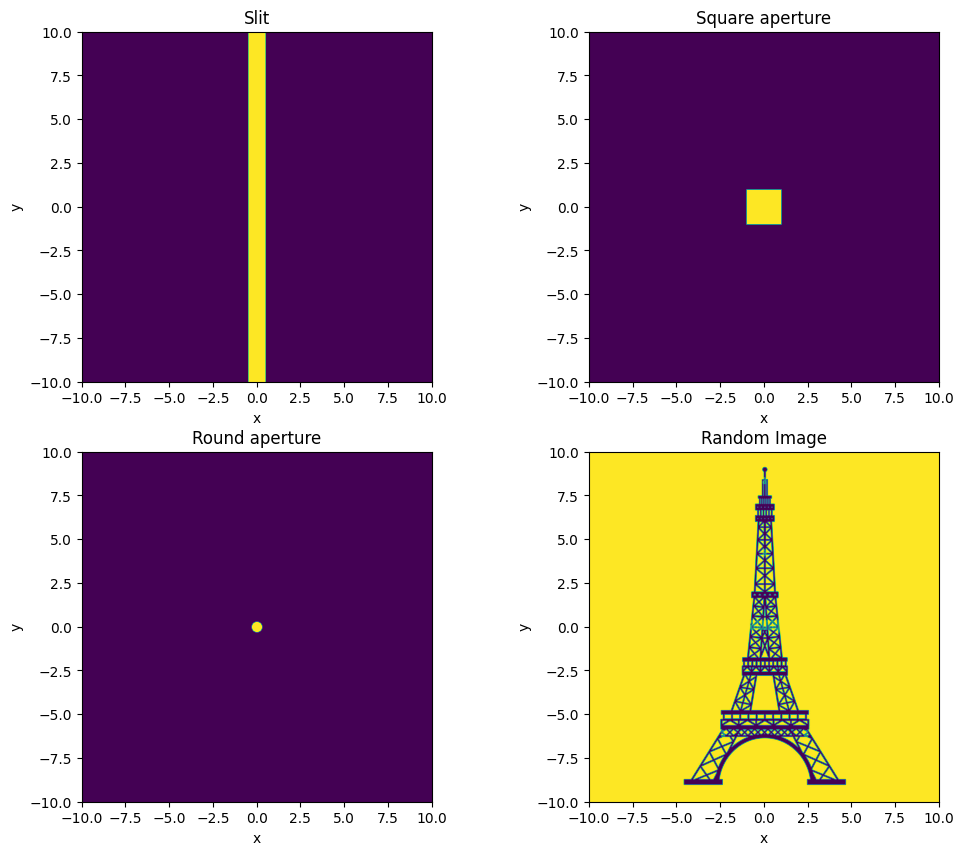

In [ ]:
#Plot the examples as 4 subplots
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.imshow(slit(X,Y,size_x,size_y),extent=[-10,10,-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Slit')

plt.subplot(2,2,2)
plt.imshow(square_aperture(X,Y,c),extent=[-10,10,-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Square aperture')

plt.subplot(2,2,3)
plt.imshow(round_aperture(X,Y,s),extent=[-10,10,-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Round aperture')


path='/content/drive/My Drive/Colab Notebooks/toureiffel.jpg'
plt.subplot(2,2,4)
plt.imshow(internet_image(X,Y,path),extent=[-10,10,-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Image')
plt.show()

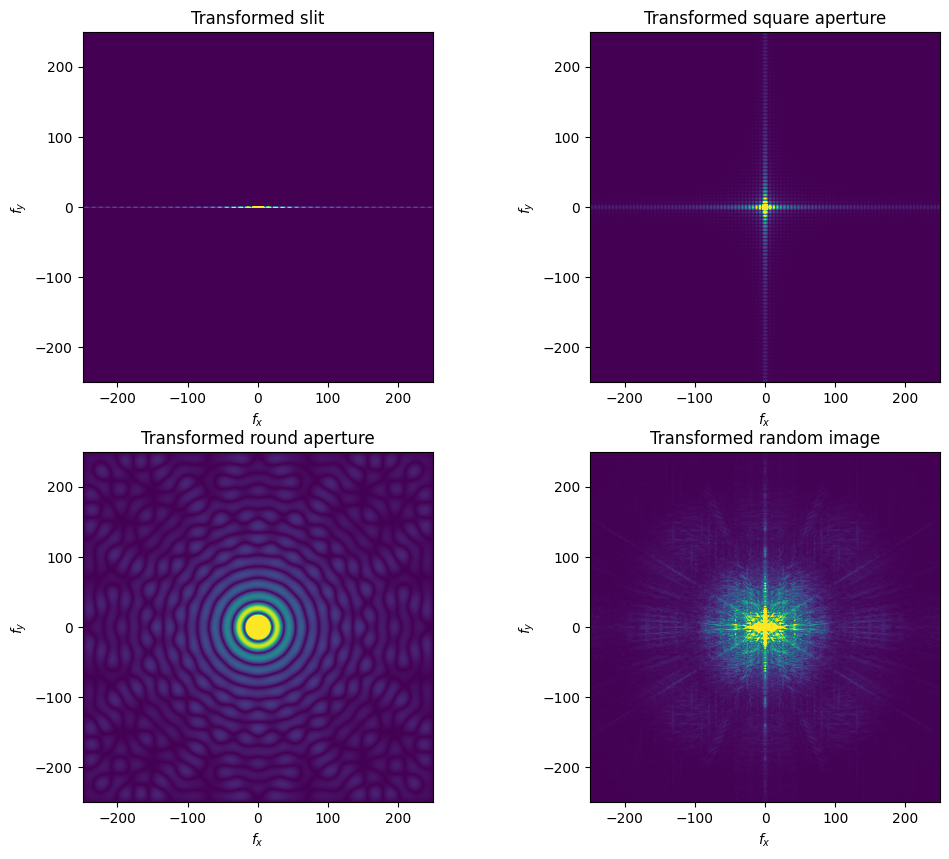

In [ ]:
# Define frequencies
freqx=np.fft.fftshift(np.fft.fftfreq(len(x),d=x[1]-x[0]))
freqy=np.fft.fftshift(np.fft.fftfreq(len(y),d=y[1]-y[0]))

# Show the FFT of the functions as 4 subplots
plt.figure(figsize=(12,10))
plt.subplot(2,2,2)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(square_aperture(X,Y,c)))),
           extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed square aperture')
# It is important to set a cut off at the intensity. Otherwise, because the color scale is linear you will just see
# a bright dot at the center that corresponde to the very low frequencies of the image.
plt.clim(0,1000)


plt.subplot(2,2,3)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(round_aperture(X,Y,s)))),
           extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed round aperture')
plt.clim(0,100)


plt.subplot(2,2,1)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(slit(X,Y,size_x,size_y)))),
           extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed slit')
plt.clim(0,1000)

plt.subplot(2,2,4)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(internet_image(X,Y,path)))),
           extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed random image')
plt.clim(0,1000)
plt.show()

# Convolution of FT

We can superimpose a slow varying image to a rapidly varying diffraction grating, to deviate the light of that figure in a certain direction. This is called multiplexing.
More generally the fourier transform of the superimposition of two images (covolution) is the multipli![4f.jpg]()cation of the fourier transforms.

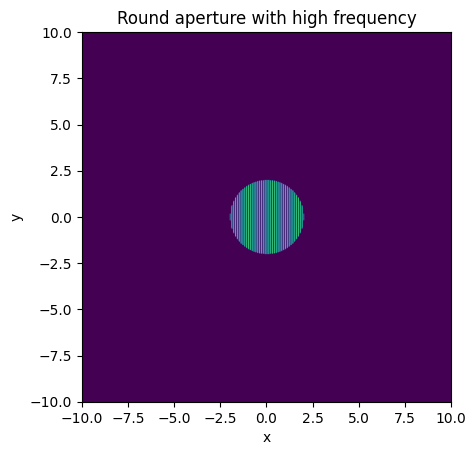

In [ ]:
#Lets define a diffraction grating, with high frequency
def high_freq(x,y,slit_size,slit_distance, slit_freq_x, slit_freq_y):

    return slit(x,y,slit_size,slit_distance)*np.cos(2*np.pi*(slit_freq_x*x+slit_freq_y*y))**2


# Multiply by the round aperture

multiplex=grating_X(x, y, 0.005, 0.01, 100)*round_aperture(X,Y,2)
plt.imshow(multiplex,extent=[-10,10,-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Round aperture with high frequency')
plt.show()


<ipython-input-88-f5098eeb8cbe>:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.where(transformed_round>10**(-5),np.log(transformed_round),0),
<ipython-input-88-f5098eeb8cbe>:32: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.where(transformed_multiplex>10**(-5) ,np.log(transformed_multiplex),0),


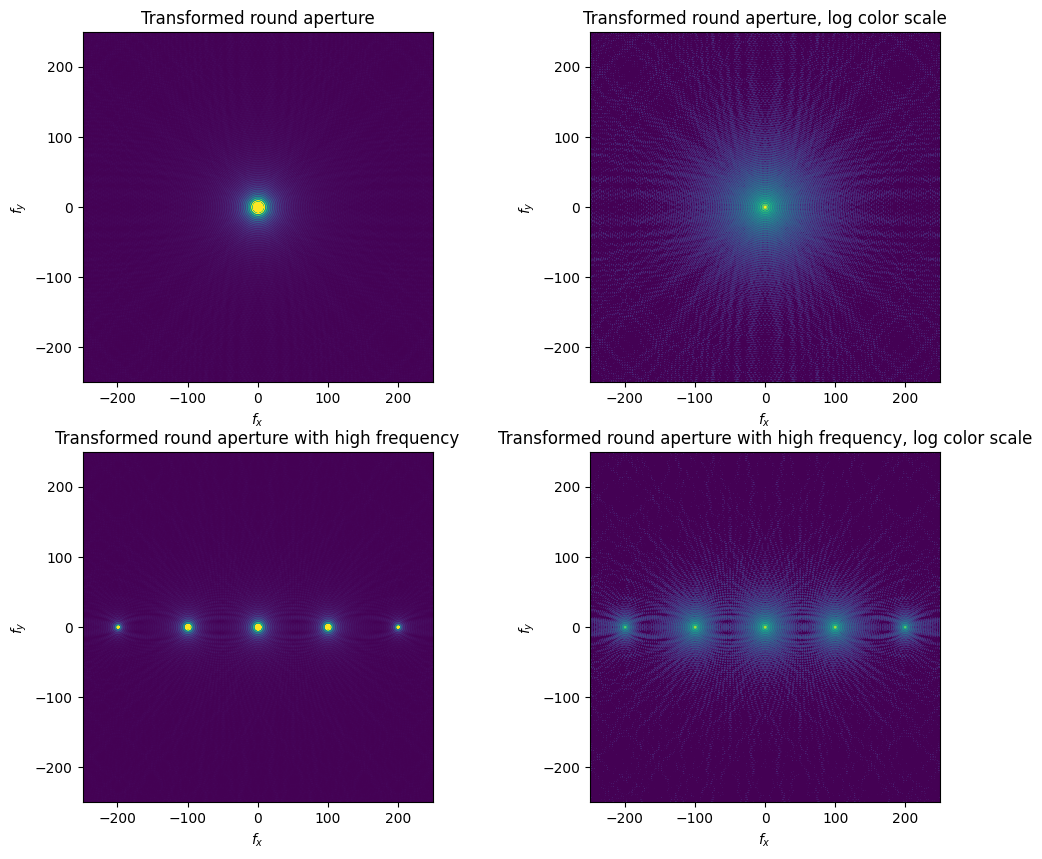

In [ ]:
# Take the fourier transform, and compare to the fourier transform of the round aperture
transformed_multiplex=np.abs(np.fft.fftshift(np.fft.fft2(multiplex)))
transformed_round=np.abs(np.fft.fftshift(np.fft.fft2(round_aperture(X,Y,2))))
freqx=np.fft.fftshift(np.fft.fftfreq(len(x),d=x[1]-x[0]))
freqy=np.fft.fftshift(np.fft.fftfreq(len(y),d=y[1]-y[0]))

#Show with and without log, normal and high frequency
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(transformed_round,extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed round aperture')
plt.clim(0,1000)

plt.subplot(2,2,2)
plt.imshow(np.where(transformed_round>10**(-5),np.log(transformed_round),0),
           extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed round aperture, log color scale')
plt.clim(2,10)

plt.subplot(2,2,3)
plt.imshow(transformed_multiplex,extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed round aperture with high frequency')
plt.clim(0,1000)

plt.subplot(2,2,4)
plt.imshow(np.where(transformed_multiplex>10**(-5) ,np.log(transformed_multiplex),0),
           extent=[np.amin(freqx),np.amax(freqx),np.amin(freqy),np.amax(freqy)])
plt.xlabel(r'$f_x$')
plt.ylabel(r'$f_y$')
plt.title('Transformed round aperture with high frequency, log color scale')
plt.clim(2,10)
plt.show()


# Fourier Filtering
In this exercise you will build a numerical 4f system, composed of: 1 object (an image of your choice), followed by a lens of focus f, placed at a distance f from the image, which produces a Fourier transform at its focal plane. A second lens of focus f, placed at a distance f after the focal plane, images the object. You will learn how to place a filter in the Fourier plane, and see how the resulting image is degraded.  

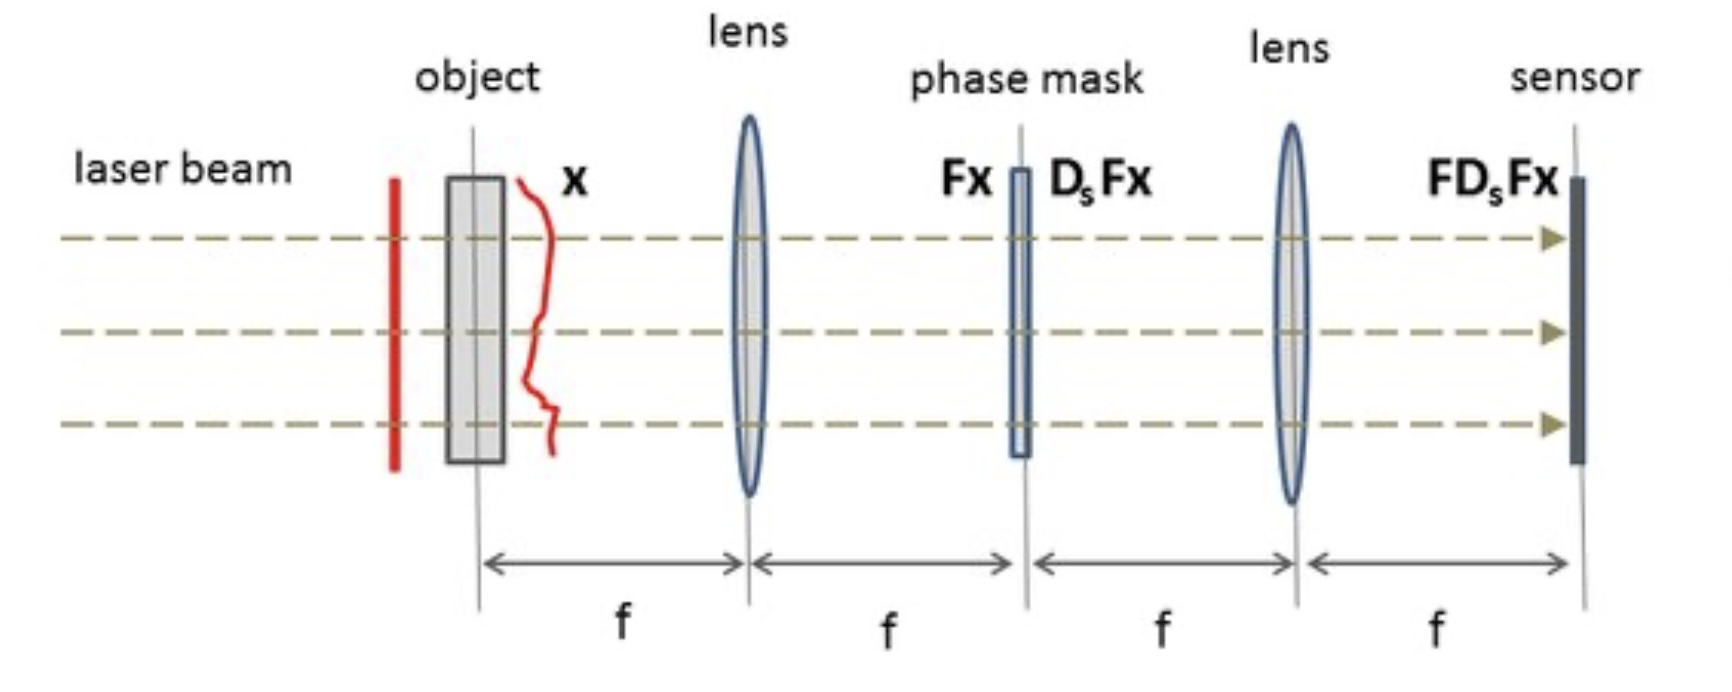

# Sixth: 4f Optical System

With the final goal of simulating the response of a 4f optical system in mind (illuminated object at z=0, first lens at z=f, second at z=3f and screen at z=4f), we can neglect the phase of the light as it goes through the system, since it will cancel out at the end. We thus deal with amplitude only. This makes us lose the transmission cut off of free space.

0) Show that with the detector placed at z=4f, you are producing a 1:1 image (magnificaiton 1) of the object.

Without having to deal with the phase, we have a simple Fourier transform in the focal plane of the first lens, that is then inverted by the second. As such, follow these steps to simulate the system:

1) Take the fourier transform of the object;

2) Obtain the frequencies coordinates of the resulting fourier trasnform. According to what was shown in class, these are directly related to spatial coordinates in the focal plane. Find these coordinates and use them to plot the focus of the first lens.
**hint**: x_freq=freq_x * wavelength * f

Turns out the focus is not a little brilliant dot as ray optics would suggest but a very tiny fourier transform of the object...

3) The second lens, placed f away from the focal plane, will invert the fourier transform perfectly (cancelling out any phase mix up) at a screen f away from said lens. Plot the image at that screen.

4) Now define a high-pass filter in real space: a small circle of zeros sorrounded by ones, to be put at the focal plane of the first lens.

The coordinates will need to match up with the ones you obtained from the Fourier transform for the focal plane, not the original object's.

5) Multiply the Fourier transform of the object by the filter, and plot the result at the focal plane of the first lens.

6) Compare to the previous image. What does the filter do?

7) Repeat steps 4 to 6 with the opposite filter (a low pass filter).


# Sample guide code

You can use this code to guide you in the homework resolution. Here, we are using a 800 nm Infrared laser from the Voxel station, and a lens with 20 cm focus. Adapt this to your focal distance, and illumination using a red HeNe laser.

In [123]:
from scipy import fftpack

#Define parameters
wavelength = 650*10**(-9) # m

# define the f of the two lenses in the 4f system
f=0.2 # in [m] the focal length of the lens

system_size, laser_size= 0.01, 0.008 # in [m] the typical dimensions of the objects
#we are imaging, < 1 cm: paraxial approximation

#these are the two filters we have available to place in the focal plane
filter_size_low, filter_size_high = 0.001, 0.002 #m (one 1 mm aperture and an opaque disc of 2 mm diameter)
#select whether you are using "low", "high" or "none" to filter the image
filter="low"

#with N_mask, we decide how many pixels we use. The pixel size depends on the dimensions of the system
N_mask, N_output = 1024, 1024
pixsize_mask = system_size / N_mask

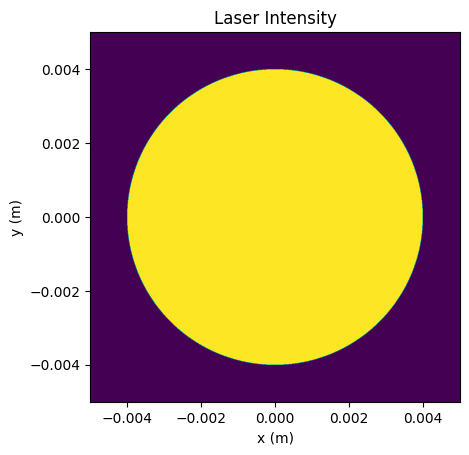

In [124]:
#Real grid
x = np.linspace(-system_size / 2, system_size / 2, num=N_mask)
y = np.linspace(-system_size / 2, system_size / 2, num=N_mask)
xx, yy = np.meshgrid(x, y)

# x and y frequencies: these are the frequency ranges that show up in the fourier plane at distance f from the first lens
# with the object at z=0, lens 1 at z=f, fourier plane at z=2f

freq_x = fftpack.fftshift(fftpack.fftfreq(N_mask, d=pixsize_mask))
freq_y = fftpack.fftshift(fftpack.fftfreq(N_mask, d=pixsize_mask))

# these frequencies can be mapped to real coordinates in the plane of the lens focus:
x_freq=freq_x*wavelength*f
y_freq=freq_y*wavelength*f
xx_freq, yy_freq = np.meshgrid(x_freq, y_freq)

#Input: monochromatic laser field with given circular apperture, just like in the class demo
input_field = np.zeros((N_mask, N_mask))
input_field[np.sqrt(xx**2+yy**2) < laser_size/2] = 1

#Show input field in meters, with axis names
plt.imshow(input_field, extent=[-system_size / 2, system_size / 2, -system_size / 2, system_size / 2])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title("Laser Intensity")
plt.show()

#Import the Object from a jpg image
# you have to choose your own object!

mypath='/content/drive/My Drive/Colab Notebooks/toureiffel.jpg'


# _object is the object we are using in the first plane where z=0. We have to
# rescale the object with our coordinate system. The laser illuminates the object

from PIL import Image
# Load the PNG file using Pillow
img = Image.open(mypath)
# Convert the image to grayscale
img = img.convert('L')
# Resize the image to the desired number of pixels
img = img.resize((len(x), len(y)))
# Convert the image to a NumPy array
img_array = np.asarray(img)
# Normalize the array
object_ = img_array / 255.0

#Filter defintion
filter_low = np.zeros((N_mask, N_mask))
filter_low[np.sqrt(xx_freq**2+yy_freq**2) < filter_size_low/2] = 1

filter_high = np.ones((N_mask, N_mask))
filter_high[np.sqrt(xx_freq**2+yy_freq**2) < (filter_size_high/2)] = 0

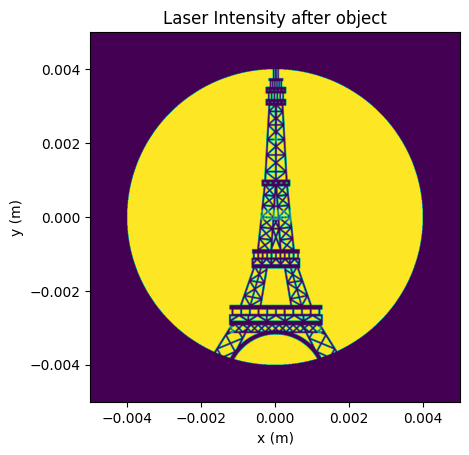

In [125]:
input_field=input_field*object_

#Show input field in meters, with axis names
plt.imshow(input_field, extent=[-system_size / 2, system_size / 2, -system_size / 2, system_size / 2])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title("Laser Intensity after object")
plt.show()


#From first lens to Fourier plane
fourier_plane = fftpack.fftshift(fftpack.fft2(fftpack.ifftshift(input_field)))

#Filter in the Fourier plane
if filter=="low":
    output_ft = fourier_plane*filter_low
elif filter=="high":
    output_ft = fourier_plane*filter_high
elif filter=="none":
    output_ft = fourier_plane
else:
    print("Error: filter not defined, you can choose none")

#Intensity at the fourier plane of the second lens, with shift
output_field = fftpack.ifftshift(fftpack.ifft2(fftpack.fftshift(output_ft)))

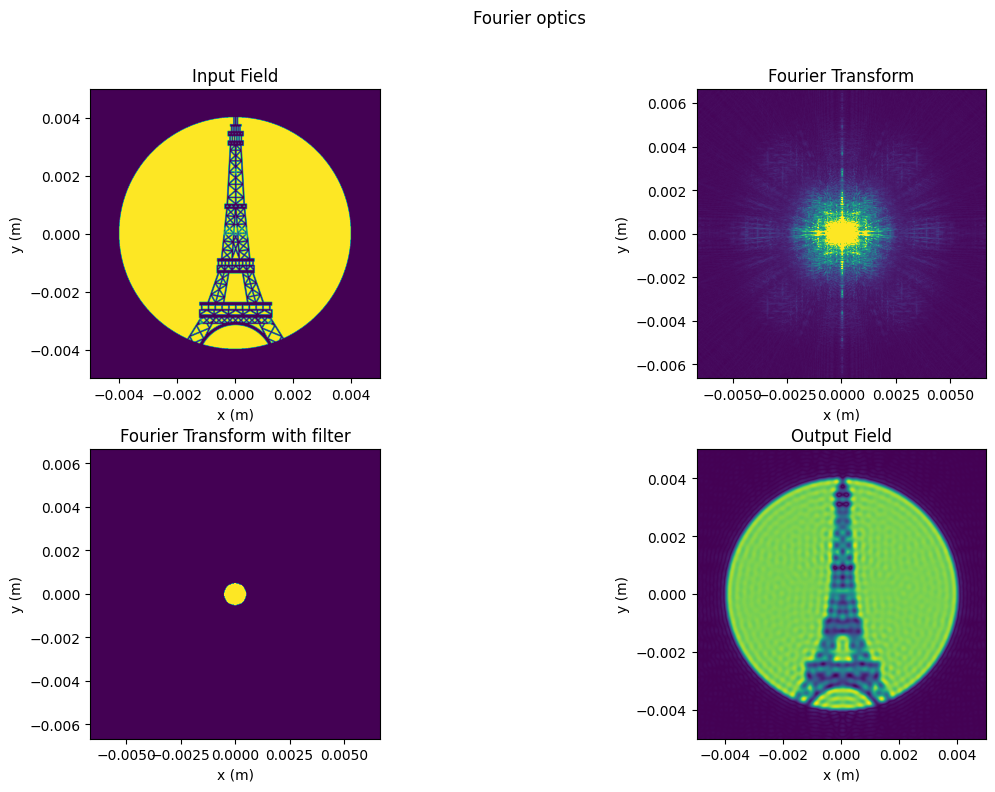

In [126]:
#Show results with independent colorbar and real scale

fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Fourier optics')
axs[0,0].set_title('Input Field')
im_1=axs[0,0].imshow(input_field, extent=[-system_size / 2, system_size / 2, -system_size / 2, system_size / 2])
axs[0,0].set_xlabel('x (m)')
axs[0,0].set_ylabel('y (m)')

axs[0,1].set_title('Fourier Transform')
axs[0,1].set_xlabel('x (m)')
axs[0,1].set_ylabel('y (m)')
im_2=axs[0,1].imshow(np.abs(fourier_plane), extent=[x_freq.min(), x_freq.max(), y_freq.min(), y_freq.max()])
if filter=="low":
    axs[1,0].set_title('Fourier Transform with filter')
    im_3=axs[1,0].imshow(np.abs(fourier_plane)*filter_low, extent=[x_freq.min(), x_freq.max(), y_freq.min(), y_freq.max()])
    axs[1,0].set_xlabel('x (m)')
    axs[1,0].set_ylabel('y (m)')
elif filter=="high":
    axs[1,0].set_title('Fourier Transform with filter')
    im_3=axs[1,0].imshow(np.abs(fourier_plane)*filter_high, extent=[x_freq.min(), x_freq.max(), y_freq.min(), y_freq.max()])
    axs[1,0].set_xlabel('x (m)')
    axs[1,0].set_ylabel('y (m)')
elif filter=="none":
    axs[1,0].set_title('Fourier Transform without filter')
    im_3=axs[1,0].imshow(np.abs(fourier_plane), extent=[x_freq.min(), x_freq.max(), y_freq.min(), y_freq.max()])
    axs[1,0].set_xlabel('x (m)')
    axs[1,0].set_ylabel('y (m)')
else:
    print("Error: filter not defined, you can choose none")
axs[1,1].set_title('Output Field')
im_4=axs[1,1].imshow(np.abs(output_field), extent=[-system_size / 2, system_size / 2, -system_size / 2, system_size / 2])
axs[1,1].set_xlabel('x (m)')
axs[1,1].set_ylabel('y (m)')
im_2.set_clim(0, 700)
im_3.set_clim(0, 700)
plt.subplots_adjust(left=0.085, bottom=0.068, right=0.93, top=0.88, wspace=0.486, hspace=0.245)

plt.savefig('/content/drive/My Drive/Colab Notebooks/toureiffel_filtered.jpg', dpi=300)
plt.show()